<a href="https://colab.research.google.com/github/Karanuderani07/ML_LEARNING/blob/main/Exp_3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
  0% 0.00/48.5k [00:00<?, ?B/s]
100% 48.5k/48.5k [00:00<00:00, 167MB/s]
Archive:  student-performance-multiple-linear-regression.zip
  inflating: Student_Performance.csv  
LINEAR REGRESSION: STUDENT PERFORMANCE PREDICTION

1. DATASET OVERVIEW
----------------------------------------------------------------------
Shape: (10000, 6)

First 10 rows:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   
5              3               78                         No         

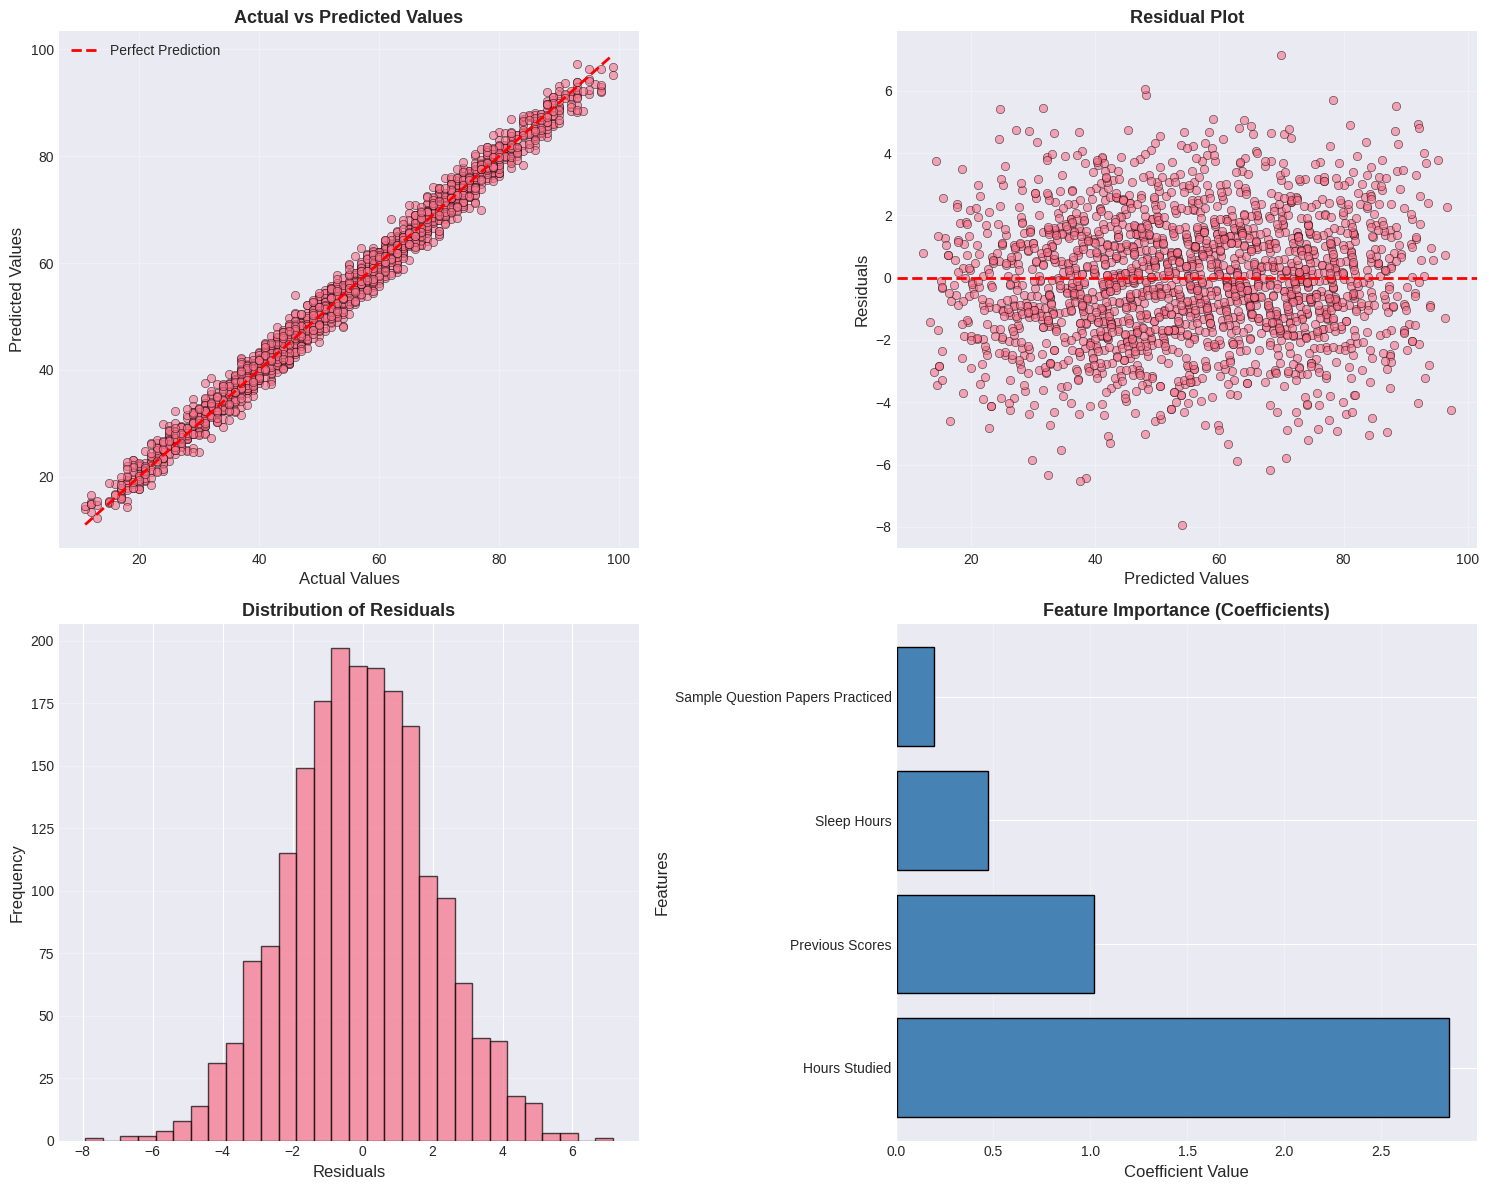

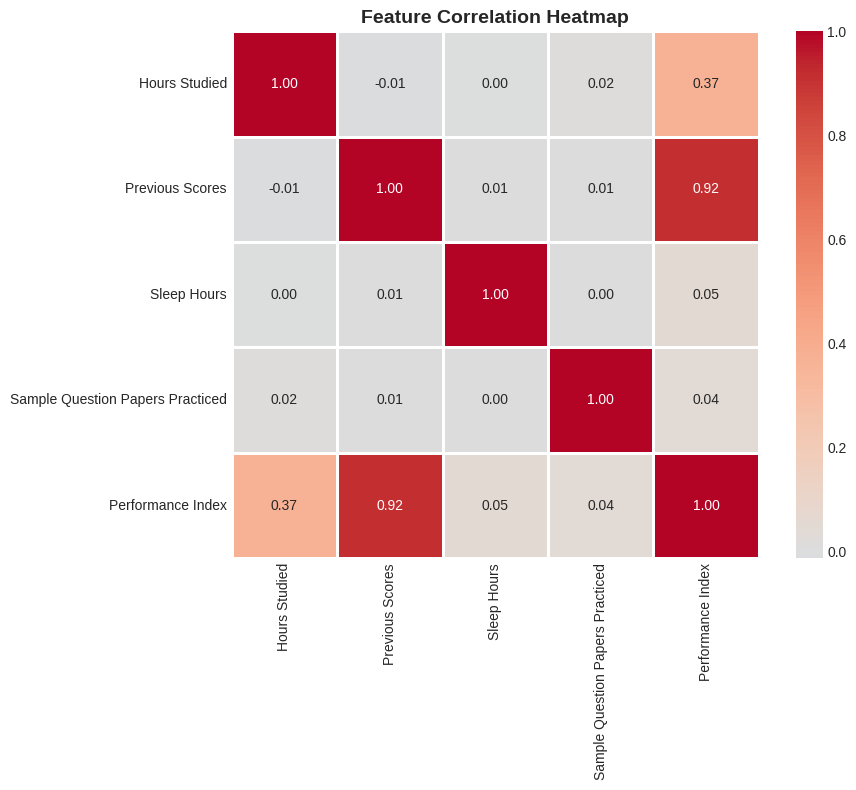


LINEAR REGRESSION ANALYSIS COMPLETE!

KEY RESULTS:
  • R² Score (Test): 0.9887
  • RMSE (Test): 2.0451
  • MAE (Test): 1.6297
  • Most important feature: Hours Studied


In [2]:
# Complete Linear Regression with External Dataset
# Dataset: Student Performance Dataset from Kaggle

# Step 1: Install Kaggle
!pip install kaggle --quiet

# Step 2: Setup Kaggle credentials
!mkdir -p ~/.kaggle
!echo '{"username":"karanuderani","key":"5fc4a285fc0912cd162a06efd99cfa14"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download dataset
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression
!unzip -o student-performance-multiple-linear-regression.zip

# Step 4: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("="*70)
print("LINEAR REGRESSION: STUDENT PERFORMANCE PREDICTION")
print("="*70)

# Step 5: Load data
df = pd.read_csv('Student_Performance.csv')

print("\n1. DATASET OVERVIEW")
print("-"*70)
print(f"Shape: {df.shape}")
print(f"\nFirst 10 rows:")
print(df.head(10))

print("\n2. DATASET INFO")
print("-"*70)
print(df.info())

print("\n3. STATISTICAL SUMMARY")
print("-"*70)
print(df.describe())

print("\n4. CHECK MISSING VALUES")
print("-"*70)
print(df.isnull().sum())

print("\n5. COLUMN NAMES")
print("-"*70)
print(df.columns.tolist())

# Step 6: Prepare data for Linear Regression
# Select numerical features
X = df.select_dtypes(include=[np.number]).drop(columns=['Performance Index'], errors='ignore')

# If Performance Index exists, use it as target
if 'Performance Index' in df.columns:
    y = df['Performance Index']
else:
    # Use the last numerical column as target
    y = df.iloc[:, -1]
    X = df.iloc[:, :-1].select_dtypes(include=[np.number])

print("\n6. FEATURES AND TARGET")
print("-"*70)
print(f"Features (X): {X.columns.tolist()}")
print(f"Target (y): {y.name}")
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n7. DATA SPLIT")
print("-"*70)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Step 8: Create and train model
print("\n8. TRAINING LINEAR REGRESSION MODEL")
print("-"*70)
model = LinearRegression()
model.fit(X_train, y_train)
print("✓ Model trained successfully!")

# Step 9: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 10: Model coefficients
print("\n9. MODEL COEFFICIENTS")
print("-"*70)
print(f"Intercept: {model.intercept_:.4f}")
print("\nFeature Coefficients:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

# Step 11: Evaluate model
print("\n10. MODEL EVALUATION")
print("-"*70)

# Training metrics
train_r2 = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)

print("Training Set Performance:")
print(f"  R² Score:              {train_r2:.4f}")
print(f"  Mean Squared Error:    {train_mse:.4f}")
print(f"  Root Mean Squared Error: {train_rmse:.4f}")
print(f"  Mean Absolute Error:   {train_mae:.4f}")

# Testing metrics
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("\nTesting Set Performance:")
print(f"  R² Score:              {test_r2:.4f}")
print(f"  Mean Squared Error:    {test_mse:.4f}")
print(f"  Root Mean Squared Error: {test_rmse:.4f}")
print(f"  Mean Absolute Error:   {test_mae:.4f}")

# Step 12: Sample predictions
print("\n11. SAMPLE PREDICTIONS")
print("-"*70)
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred_test[:10],
    'Difference': y_test.values[:10] - y_pred_test[:10]
})
print(comparison)

# Step 13: Visualizations
print("\n12. GENERATING VISUALIZATIONS")
print("-"*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values', fontsize=12)
axes[0, 0].set_ylabel('Predicted Values', fontsize=12)
axes[0, 0].set_title('Actual vs Predicted Values', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_pred_test
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residual Distribution
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuals', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Residuals', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Feature Coefficients
axes[1, 1].barh(coef_df['Feature'], coef_df['Coefficient'],
                color='steelblue', edgecolor='black')
axes[1, 1].set_xlabel('Coefficient Value', fontsize=12)
axes[1, 1].set_ylabel('Features', fontsize=12)
axes[1, 1].set_title('Feature Importance (Coefficients)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Plot 5: Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("LINEAR REGRESSION ANALYSIS COMPLETE!")
print("="*70)
print(f"\nKEY RESULTS:")
print(f"  • R² Score (Test): {test_r2:.4f}")
print(f"  • RMSE (Test): {test_rmse:.4f}")
print(f"  • MAE (Test): {test_mae:.4f}")
print(f"  • Most important feature: {coef_df.iloc[0]['Feature']}")
print("="*70)